# Drawing App
- Try thif if you don't have any image loaded and still want to test controlnet

# @title <font color='red'>Drawing APP</font> {vertical-output: true, run: "auto"}

import ipywidgets as widgets
from ipywidgets import Layout, Button, Box
from IPython.display import display, HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

Square_Size = 512 #@param ["256", "512"] {type:"raw"}
Brush_Size = 3 #@param {type:"slider", min:0, max:100, step:5}
filename = "my_drawing"#@param [] {allow-input: true}
filename = filename + ".png"

js_code = '''
<style>
  .colors-buttons div {
      width: 30px;
      height: 30px;
      margin: 2px;}
  div {
      display: flex;
  }
  canvas{border:1px solid black !important;}
</style>

<canvas id="myCanvas" width="%d" height="%d"></canvas>

<div class="colors-buttons">
  <div class="color" style="background-color: #000000;" id-color="#000000"></div>
  <div class="color" style="background-color: #FFFFFF;" id-color="#FFFFFF"></div>
  <div class="color" style="background-color: #FFFF00;" id-color="#FFFF00"></div>
  <div class="color" style="background-color: #FF00FF;" id-color="#FF00FF"></div>
  <div class="color" style="background-color: #00FFFF;" id-color="#00FFFF"></div>
  <div class="color" style="background-color: #FF0000;" id-color="#FF0000"></div>
  <div class="color" style="background-color: #0000FF;" id-color="#0000FF"></div>
  <div class="color" style="background-color: #00FF00;" id-color="#00FF00"></div>
</div>

<script>
  var canvas = document.querySelector('canvas')
  var ctx = canvas.getContext('2d')


  ctx.fillStyle = 'white';
  ctx.fillRect( 0, 0, canvas.width, canvas.height)
  var Brush_Size = %d

  var button = document.querySelector('button')
  var mouse = {x: 0, y: 0}


  canvas.addEventListener('mousemove', function(e) {
    mouse.x = e.pageX - this.offsetLeft
    mouse.y = e.pageY - this.offsetTop
  })
  canvas.onmousedown = ()=>{
    ctx.beginPath()
    ctx.moveTo(mouse.x, mouse.y)

    canvas.addEventListener('mousemove', onPaint)
  }
  canvas.onmouseup = ()=>{
    canvas.removeEventListener('mousemove', onPaint)
  }
  var onPaint = ()=>{

    ctx.fillRect(mouse.x-( Brush_Size/2), mouse.y-(Brush_Size/2), Brush_Size, Brush_Size)

    ctx.stroke()
  }

  const colors = document.getElementsByClassName('color');

  Array.from(colors).forEach(color => {
      color.addEventListener('click', (event) => {
          const colorSelected = event.target.getAttribute('id-color');
          ctx.fillStyle = colorSelected;
      });
  });

    // FINISH BUTTON
  var data = new Promise(resolve=>{
    button.onclick = ()=>{
      resolve(canvas.toDataURL('image/jpg'))
    }
  })
</script>
'''


## Function to Appear Image Canvas
def draw(filename=filename,  w=Square_Size, h=Square_Size, Brush_Size=Brush_Size):
  display(HTML(js_code % (w, h, Brush_Size)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  if AttributeError:
    pass
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)
  if button2.on_click(on_button_clicked2):
    pass


## Action for Reset Button
def on_button_clicked(b):
  with output:
    #display(HTML(canvas_html % ( w=$Square_Size, h=$Square_Size, Brush_Size=$Brush_Size)))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
      f.write(binary)
  return len(binary)


## Show Save Button & Save outputs
button = widgets.Button(description="Save")
button.on_click(on_button_clicked)
output = widgets.Output()
display(button, output)

## Show Canvas for the First Time
draw(filename=filename,  w=Square_Size, h=Square_Size, Brush_Size=Brush_Size)
print("Image Saved at")

# Downlad Requirements

In [1]:
!pip install diffusers==0.14.0 transformers xformers git+https://github.com/huggingface/accelerate.git
!pip install --upgrade git+https://github.com/huggingface/diffusers.git
!pip install opencv-contrib-python
!pip install controlnet_aux


  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-0eypnjtu
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /tmp/pip-req-build-0eypnjtu
  Resolved https://github.com/huggingface/accelerate.git to commit 2b53a9089c8a688eb561b6655053b301a5bf68ac
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0

# Loading the model

In [1]:
print("What do you want to do ?\n1. Draw from a scribble\n2. Draw from a pose")
CNType = input()
if "scribble" in CNType.lower() or CNType == "1" :
  CNType = "scribble"
elif "pose" in CNType.lower() or CNType == "2" :
  CNType = "pose"
else :
  print("Select 1 or 2")

What do you want to do ?
1. Draw from a scribble
2. Draw from a pose
2


In [2]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch
# for canny images
if CNType == "scribble" :
  control_model = "lllyasviel/sd-controlnet-canny"
# For posing
elif CNType == "pose" :
  control_model = "fusing/stable-diffusion-v1-5-controlnet-openpose"
sd_model = "admruul/anything-v3.0"
sd_model = "redstonehero/mixprov4_v4"
controlnet = ControlNetModel.from_pretrained(control_model, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    sd_model, controlnet=controlnet, torch_dtype=torch.float16,safety_checker=None
)
from diffusers import UniPCMultistepScheduler

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

#pipe.enable_xfIormers_memory_efficient_attention()




    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cu118)
    Python  3.10.13 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


# Import the Image
- it can be a drawing or any image you find on the internet

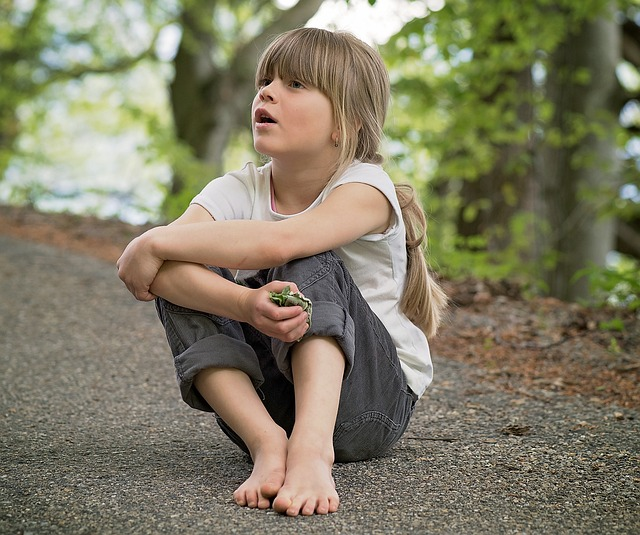

In [3]:
# For downloading images do
# !wget install  \path\to\web\image
from diffusers.utils import load_image

image = load_image(
    "./s1.jpg"
)
image

# Getting a Canny version of the image

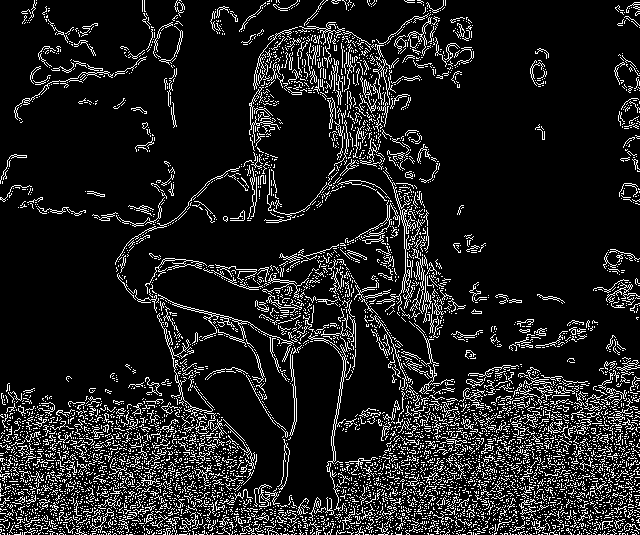

In [8]:
if CNType == "scribble" :
  import cv2
  from PIL import Image
  import numpy as np

  image = np.array(image)

  low_threshold = 100
  high_threshold = 200

  image = cv2.Canny(image, low_threshold, high_threshold)
  image = image[:, :, None]
  image = np.concatenate([image, image, image], axis=2)
  canny_image = Image.fromarray(image)
  canny_image


In case your image is about poses , try this

In [4]:
if CNType == "pose" :
  from controlnet_aux import OpenposeDetector

  model = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

  canny_image = model(image)

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


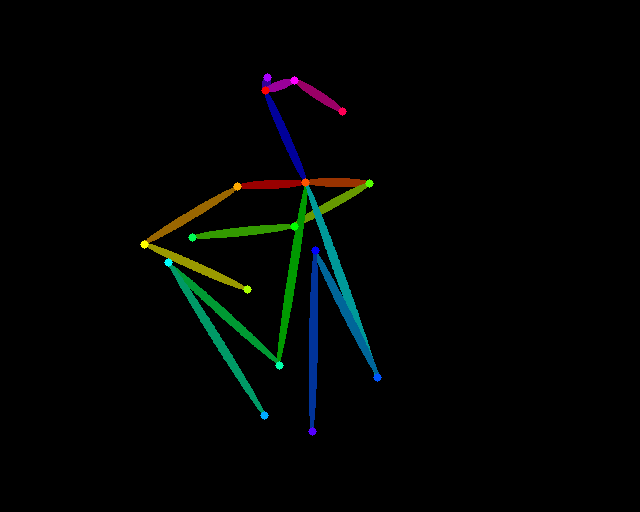

In [5]:
canny_image

In [6]:
prompt = "a girl , short black hair ,  yellow jacket  , mountaintop, very sharp , rivers and waterfall in background"
import random
gen1 = None
if not gen1:
  gen1 = random.randint(1,324235)
print("Seed :",gen1)
# Now to display an image you can either save it such as:
#image.save(f"astronaut_rides_horse.png"print("ct is",CNType))
negative_prompt = "EasyNegative, badhandv4, bad_prompt_version2-neg, verybadimagenegative"
num_images = 4


Seed : 12383


In [7]:
gen_image = pipe(
    prompt=prompt,
    image=canny_image,
    negative_prompt=negative_prompt,
    width=512,
    height=512,
    num_inference_steps=30,
    guidance_scale=7.5,
    num_images_per_prompt=num_images,
    generator=torch.manual_seed(gen1),
).images


  0%|          | 0/30 [00:00<?, ?it/s]

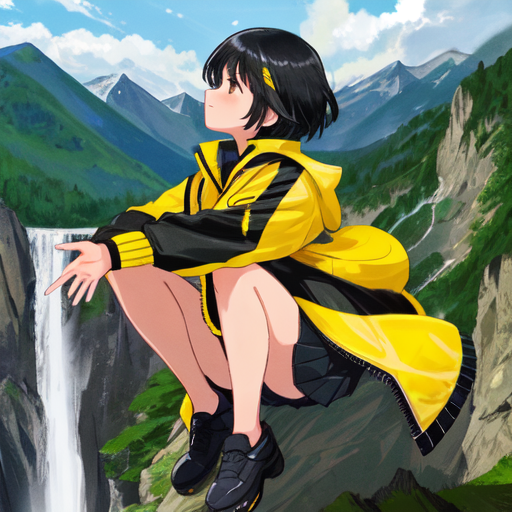

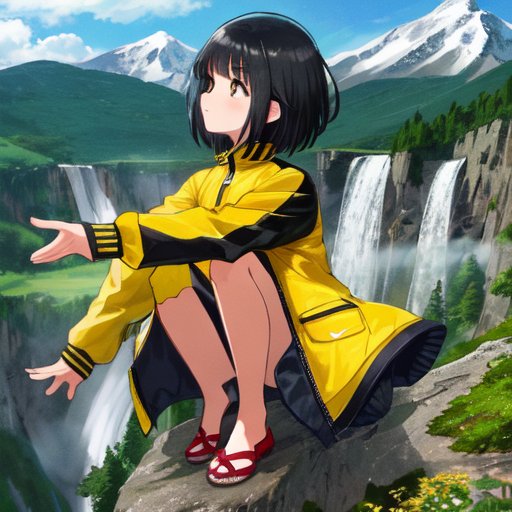

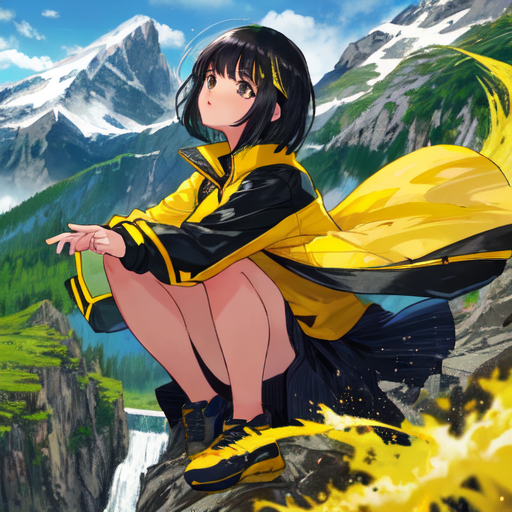

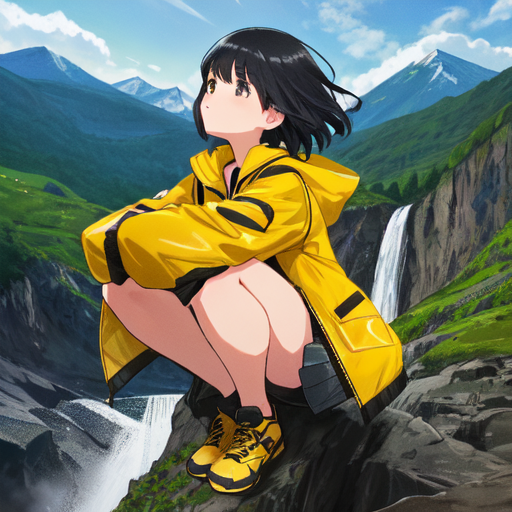

In [8]:
from IPython.display import display
w, h = gen_image[0].size
for i in gen_image:
  display(i)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
!killall python3